## Letter Recognition using SVM
    - The objective is to solve letter recognition using SVM.The dataset contains the 26 English alphabets as classes,  it's a multiclass classification problem with 26 classes. 

### 1. Import and Understand data

In [49]:
import warnings
warnings.filterwarnings('ignore')

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [51]:
letter_df = pd.read_csv('letter-recognition.csv')
letter_df.head(5)

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [52]:
letter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [53]:
letter_df.shape

(20000, 17)

In [54]:
# some columns have spaces at the end. So it is required remove the spaces, as it will cause an issue in index
print(letter_df.columns)

Index(['letter', 'xbox ', 'ybox ', 'width ', 'height', 'onpix ', 'xbar ',
       'ybar ', 'x2bar', 'y2bar ', 'xybar ', 'x2ybar', 'xy2bar', 'xedge ',
       'xedgey', 'yedge ', 'yedgex'],
      dtype='object')


In [55]:
# let's 'reindex' the column names
letter_df.columns = ['letter', 'xbox', 'ybox', 'width', 'height', 'onpix', 'xbar',
       'ybar', 'x2bar', 'y2bar', 'xybar', 'x2ybar', 'xy2bar', 'xedge',
       'xedgey', 'yedge', 'yedgex']
print(letter_df.columns)

Index(['letter', 'xbox', 'ybox', 'width', 'height', 'onpix', 'xbar', 'ybar',
       'x2bar', 'y2bar', 'xybar', 'x2ybar', 'xy2bar', 'xedge', 'xedgey',
       'yedge', 'yedgex'],
      dtype='object')


In [56]:
letter_df.head(5)

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [57]:
order = list(np.sort(letter_df['letter'].unique()))
print(order)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


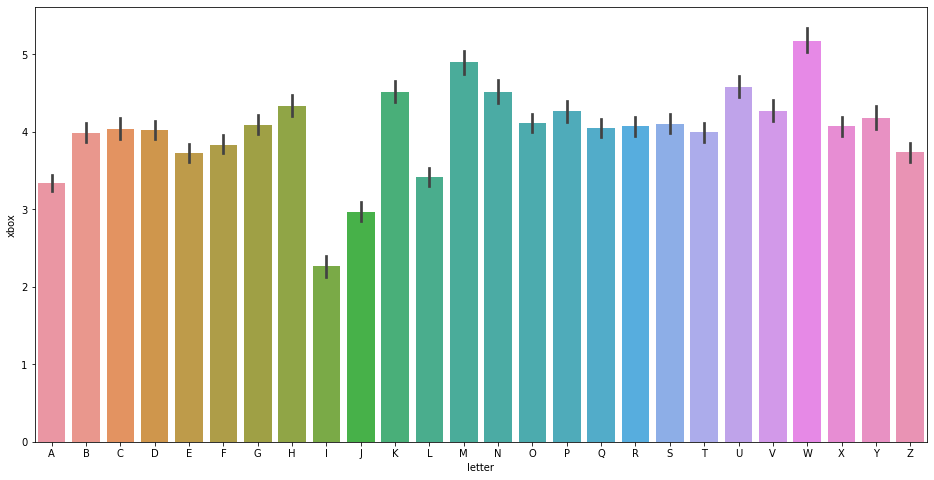

In [58]:
plt.figure(figsize=(16,8))
sns.barplot(x='letter', y='xbox', data = letter_df, order=order)

In [59]:
letter_means = letter_df.groupby('letter').mean()
letter_means.head()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
letter,,,,,,,,,,,,,,,,
A,3.337136,6.975919,5.128010,5.178707,2.991128,8.851711,3.631179,2.755387,2.043093,7.802281,2.338403,8.465146,2.771863,6.321926,2.875792,7.468948
B,3.985640,6.962141,5.088773,5.169713,4.596606,7.671018,7.062663,5.366841,5.571802,7.954308,5.506527,6.652742,3.117493,7.919060,6.612272,9.100522
C,4.031250,7.063859,4.701087,5.296196,2.775815,5.437500,7.627717,5.927989,7.177989,8.773098,7.494565,11.947011,1.991848,8.876359,4.080163,8.555707
D,4.023602,7.244720,5.170186,5.288199,4.026087,7.539130,6.806211,5.921739,6.508075,8.166460,5.111801,5.750311,3.365217,7.813665,3.971429,7.628571
E,3.727865,6.944010,4.756510,5.201823,3.679688,5.966146,7.352865,4.223958,7.585938,8.507812,6.242188,10.341146,2.127604,8.298177,6.022135,8.506510


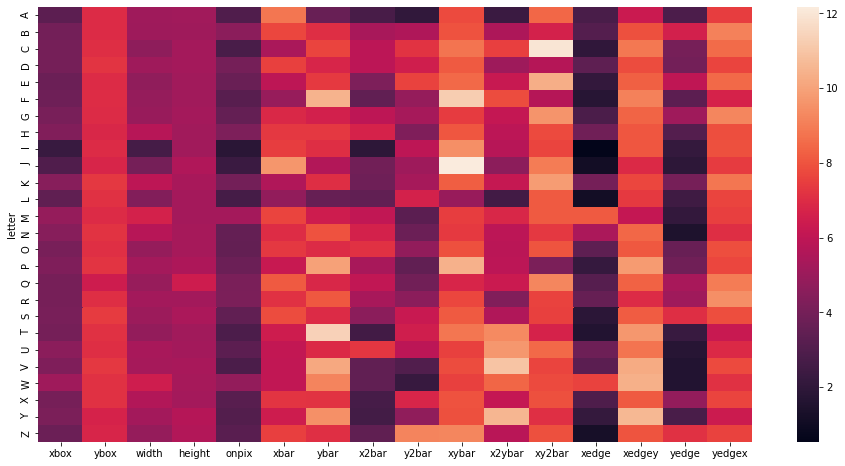

In [60]:
# plot the heat map 
plt.figure(figsize=(16,8))
sns.heatmap(letter_means)

## 2. Data Preperation

In [61]:
letter_df.describe()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


- All the columns have no much differnece in the average score.Even then, it's better to rescale them

In [62]:
# Scaling the variables 
X = letter_df.drop('letter', axis=1) 
y = letter_df['letter'] 

from sklearn.preprocessing import scale
X = scale(X)

In [63]:
# split the dataset into train and test data
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state= 100)

## 3. Model Building

    - Let's try building two basic linear and non-linear model with default parameters. Since this is a multi classification problem with 26 classes, it's better to find out the classifier is linear or non-linear

In [64]:
# linear model 

from sklearn.svm import SVC

model_linear = SVC(kernel='linear')
model_linear.fit(X_train, y_train) 

# y_pred 
y_linear_pred = model_linear.predict(X_test)

In [66]:
# Confusion matrix 

from sklearn.metrics import confusion_matrix 
confusion_matrix(y_true = y_test, y_pred= y_linear_pred)

array([[214,   1,   1,   0,   0,   0,   1,   0,   0,   2,   0,   0,   3,
          0,   0,   0,   0,   2,   0,   0,   1,   0,   0,   0,   2,   1],
       [  0, 179,   0,   3,   3,   0,   3,   5,   2,   0,   0,   0,   0,
          0,   0,   1,   1,   5,   3,   0,   0,   0,   0,   2,   0,   0],
       [  0,   0, 193,   0,  11,   0,   3,   2,   0,   0,   8,   0,   1,
          0,   5,   0,   0,   0,   0,   0,   4,   0,   0,   0,   0,   0],
       [  1,  11,   0, 218,   0,   0,   0,   2,   0,   0,   2,   0,   2,
          2,   1,   2,   0,   4,   0,   0,   3,   0,   0,   0,   0,   0],
       [  0,   0,   1,   0, 175,   2,   4,   0,   0,   0,   0,   3,   0,
          0,   0,   1,   5,   0,   6,   6,   0,   0,   0,   1,   0,   3],
       [  0,   0,   1,   2,   3, 213,   3,   1,   2,   0,   0,   0,   0,
          2,   0,   3,   0,   0,   5,   7,   1,   0,   0,   0,   1,   1],
       [  0,   0,  10,   4,   8,   0, 172,   1,   0,   0,   7,   1,   0,
          0,   2,   0,  18,   3,   5,   0,   

 - Confusion Matrix contains lot of variables due to multi classification. 

In [69]:
from sklearn import metrics
print('Accuracy' ,metrics.accuracy_score(y_test, y_linear_pred)*100)

Accuracy 85.68333333333334


 - Linear model in this problem shows 85% accuracy. 

In [71]:
# Let's try building a Non-Linear Model 

model_nonlinear = SVC(kernel='rbf')
model_nonlinear.fit(X_train, y_train) 
y_nonlinear_pred = model_nonlinear.predict(X_test)

In [73]:
# Confusion Matrix
print(metrics.confusion_matrix(y_true = y_test, y_pred = y_nonlinear_pred))

[[220   1   1   1   0   0   0   0   0   0   0   0   4   0   0   0   0   0
    0   0   0   0   0   0   1   0]
 [  0 198   0   1   2   0   0   0   0   0   0   0   0   0   0   0   0   2
    2   0   0   0   0   2   0   0]
 [  0   0 205   0   7   0   5   1   0   0   1   0   0   0   6   0   0   0
    0   0   1   0   1   0   0   0]
 [  0   1   0 234   0   0   0   5   0   0   0   0   0   3   0   0   0   4
    0   0   1   0   0   0   0   0]
 [  0   0   2   0 196   1   4   0   0   0   0   0   0   0   0   0   0   0
    1   0   0   0   0   0   0   3]
 [  0   1   0   2   3 226   0   0   1   0   0   0   0   1   0   3   0   0
    1   6   0   0   0   1   0   0]
 [  0   0   0   4   2   0 228   0   0   0   0   1   0   0   0   0   1   5
    0   0   0   0   0   0   0   0]
 [  0   6   1   7   0   0   4 192   0   0   4   0   0   0   1   0   1  11
    0   0   0   0   0   1   0   0]
 [  0   0   3   1   0   3   0   0 213   2   0   0   0   1   0   0   0   0
    2   0   0   0   0   0   0   1]
 [  1   0   0   0  

In [76]:
# Accuracy 

print('Accuracy', metrics.accuracy_score(y_true = y_test, y_pred= y_nonlinear_pred)*100)

Accuracy 94.05


 - Accuracy % for the non-linear model is 94.05 which is higher than the linear model accuracy score 85%. Thus going forward we can build a non-linear model with best set of hyperparameters

## 4. Grid Search : Hyperparameter tuning

    - Let's now tune the model to find the optimal values of C and gamma corresponding to an RBF kernel. We'll use 5-fold cross validation.

In [77]:
# Creating a KFold object with 5 splits 
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV 

folds = KFold(n_splits=5, shuffle=True, random_state= 4)

# Specifying the range of hyperparameters 
hyper_params = [{'gamma' : [1e-2, 1e-3,1e-4],
                 'C': [1,10,100,1000]}] 

model = SVC(kernel='rbf') 

model_cv = GridSearchCV(estimator=model,
                        param_grid= hyper_params,
                        scoring= 'accuracy',
                        cv = folds, 
                        verbose = 1,
                        return_train_score= True) 

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  8.8min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.01, 0.001, 0.0001]}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [78]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.388279,0.050413,1.263017,0.021996,1,0.01,"{'C': 1, 'gamma': 0.01}",0.838929,0.834286,0.839286,...,0.833429,0.005386,7,0.842768,0.844554,0.844196,0.846696,0.846696,0.844982,0.001522
1,5.386128,0.133477,1.687699,0.065471,1,0.001,"{'C': 1, 'gamma': 0.001}",0.691786,0.682857,0.686071,...,0.680786,0.008022,10,0.690089,0.692143,0.688036,0.687679,0.684821,0.688554,0.002458
2,10.521309,0.185643,1.898126,0.042530,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.245000,0.248571,0.248571,...,0.243071,0.006722,12,0.245804,0.269464,0.257143,0.249018,0.237411,0.251768,0.010875
3,1.335148,0.020244,0.833896,0.014656,10,0.01,"{'C': 10, 'gamma': 0.01}",0.912857,0.910714,0.907857,...,0.907071,0.004697,3,0.924821,0.926250,0.925000,0.926964,0.928304,0.926268,0.001291
4,2.360143,0.094445,1.247876,0.030681,10,0.001,"{'C': 10, 'gamma': 0.001}",0.819643,0.813929,0.818571,...,0.811214,0.007833,8,0.815446,0.818750,0.815446,0.822054,0.822768,0.818893,0.003124
5,5.120720,0.124564,1.629052,0.087025,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.690357,0.682857,0.685357,...,0.680357,0.007549,11,0.690536,0.691250,0.686875,0.688125,0.684375,0.688232,0.002496
6,1.432172,0.018473,0.669600,0.015855,100,0.01,"{'C': 100, 'gamma': 0.01}",0.951429,0.948214,0.947500,...,0.944857,0.005953,2,0.976071,0.977946,0.977232,0.976518,0.978304,0.977214,0.000838
7,1.547261,0.043223,0.923805,0.042710,100,0.001,"{'C': 100, 'gamma': 0.001}",0.865714,0.866429,0.858929,...,0.858786,0.006615,5,0.872321,0.875179,0.873661,0.877232,0.874286,0.874536,0.001638
8,2.343521,0.020420,1.273030,0.021025,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.810357,0.807857,0.807500,...,0.804714,0.004956,9,0.809196,0.814554,0.810536,0.817143,0.817232,0.813732,0.003327
9,1.482516,0.011115,0.575240,0.006206,1000,0.01,"{'C': 1000, 'gamma': 0.01}",0.960357,0.950357,0.954286,...,0.950143,0.007997,1,0.997143,0.997411,0.996875,0.996250,0.997500,0.997036,0.000450


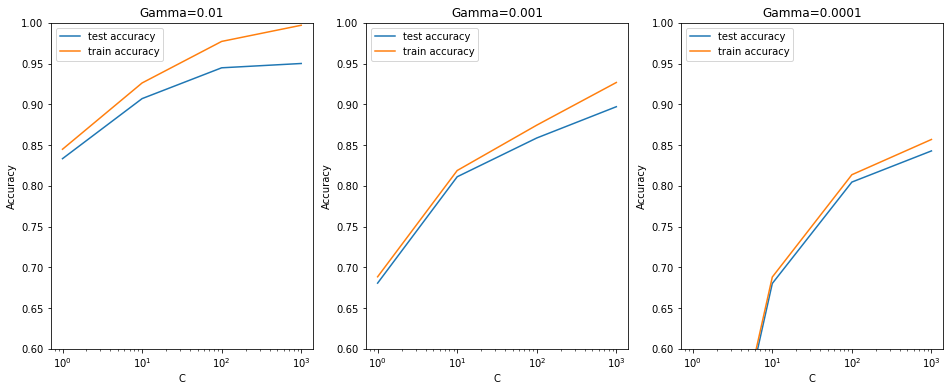

In [79]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


The plots above show some useful insights:
- Non-linear models (high gamma) perform *much better* than the linear ones
- At any value of gamma, a high value of C leads to better performance
- None of the models tend to overfit (even the complex ones), since the training and test accuracies closely follow each other

This suggests that the problem and the data is **inherently non-linear** in nature, and a complex model will outperform simple, linear models in this case.

Let's now choose the best hyperparameters. 

In [81]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9501428571428571 corresponding to hyperparameters {'C': 1000, 'gamma': 0.01}


### Building and Evaluating the Final Model

Let's now build and evaluate the final model, i.e. the model with highest test accuracy.

In [83]:
# model with optimal hyperparameters

# model
model = SVC(C=1000, gamma=0.01, kernel="rbf")

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# metrics
print("accuracy", metrics.accuracy_score(y_test, y_pred), "\n")
print(metrics.confusion_matrix(y_test, y_pred), "\n")



accuracy 0.9586666666666667 

[[225   1   0   1   0   0   1   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0 198   0   1   1   0   0   1   0   0   0   0   0   0   0   0   0   1
    0   0   0   4   0   1   0   0]
 [  0   0 216   0   4   0   2   0   0   0   1   0   0   0   3   0   0   0
    0   0   1   0   0   0   0   0]
 [  0   1   0 235   0   0   1   3   0   0   0   0   0   4   1   0   1   2
    0   0   0   0   0   0   0   0]
 [  0   1   0   0 200   1   2   0   0   0   0   1   0   0   0   0   0   0
    0   0   0   0   0   0   0   2]
 [  0   1   1   1   1 230   0   1   1   0   0   0   0   1   0   4   0   0
    0   3   0   0   0   0   1   0]
 [  0   1   4   0   3   1 222   1   0   0   1   3   0   0   1   0   0   2
    1   0   0   0   1   0   0   0]
 [  0   5   1   2   0   0   1 214   0   0   4   0   0   0   1   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   1   0   0   1   0   0 218   5   0   0   0   0   0   1   0   0
    0   0   0   0   0   

## Conclusion

The accuracy achieved using a non-linear kernel (~0.95) is mush higher than that of a linear one (~0.85). We can conclude that the problem is highly non-linear in nature.